In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import numpy as np
from lmfit.models import ConstantModel, GaussianModel, LorentzianModel

df = pd.read_excel("AmostraH.xls", sheet_name=None)

In [2]:
tab1 = df["XPS Survey"]
tab2 = df["O1s Scan"]
tab3 = df["C1s Scan"]
tab4 = df["Si2p Scan"]

In [3]:
BE = []
COUNT = []

for i in range(15, 1375):
    BE.append(tab1["Unnamed: 0"][i]) # Binding Energy
    COUNT.append(mt.log(tab1["Unnamed: 2"][i])) # Counts per second

BE_O = []    
COUNT_O = []

for i in range(15, 216):
    BE_O.append(tab2["Unnamed: 0"][i]) 
    COUNT_O.append(mt.log(tab2["Unnamed: 2"][i]))

    
BE_C = []    
COUNT_C = []

for i in range(15, 205):
    BE_C.append(tab3["Unnamed: 0"][i]) 
    COUNT_C.append(mt.log(tab3["Unnamed: 2"][i]))
    
    
BE_Si2 = []    
COUNT_Si2 = []

for i in range(15, 165):
    BE_Si2.append(tab4["Unnamed: 0"][i]) 
    COUNT_Si2.append(mt.log(tab4["Unnamed: 2"][i])) 

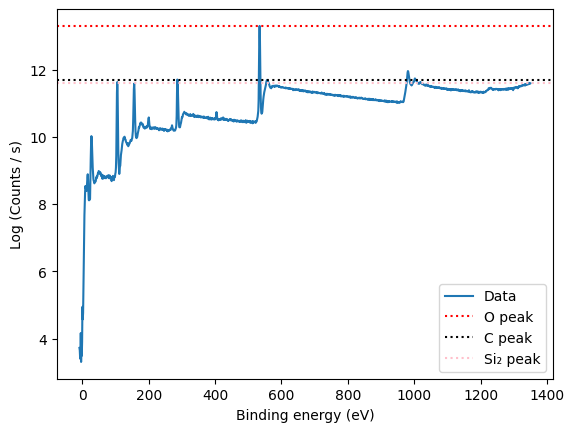

In [4]:
fig, ax = plt.subplots()

ax.plot(BE, COUNT, label="Data"
)

ax.axhline(y = max(COUNT), color = 'r', linestyle = ':', label = 'O peak'
)

ax.axhline(y = 11.7, color = 'black', linestyle = ':', label = 'C peak'
)

ax.axhline(y = 11.6, color = 'pink', linestyle = ':', label = 'Si₂ peak'
)


plt.xlabel("Binding energy (eV)")
plt.ylabel("Log (Counts / s)")

ax.legend()

## Si2

In [6]:
BE_Si2 = [value for value in BE_Si2 if value > 95]
COUNT_Si2 = [count for count, value in zip(COUNT_Si2, BE_Si2) if value > 95]

#print(BE_Si2)

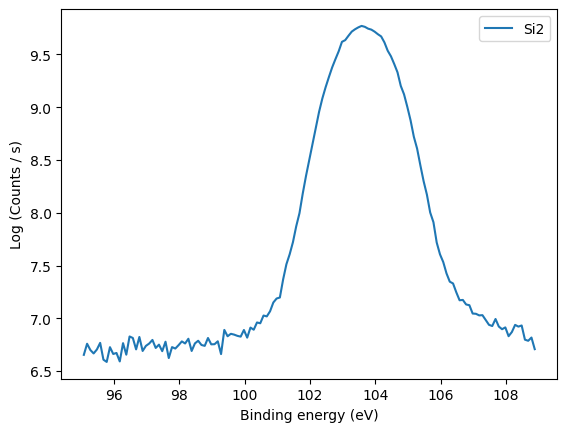

In [7]:
plt.plot(BE_Si2, COUNT_Si2, label="Si2")

plt.xlabel("Binding energy (eV)")
plt.ylabel("Log (Counts / s)")

plt.legend()

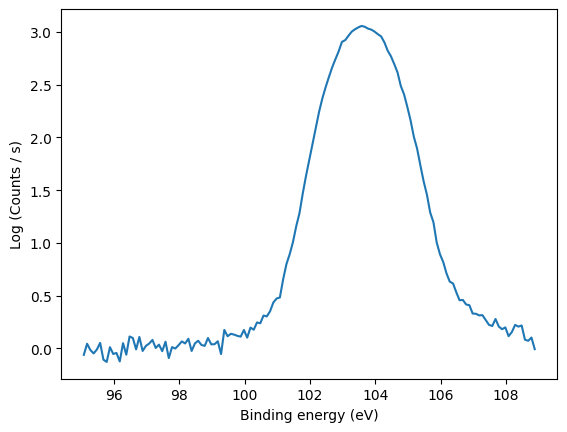

In [45]:
# Perform the logic for values <= 526
filtered_counts = [count for ev, count in zip(BE_Si2, COUNT_Si2) if ev <= 98]
mean_filtered_counts = sum(filtered_counts) / len(filtered_counts)  # Calculate mean

# Subtract the mean from all counts values
new_counts_Si2 = [count - mean_filtered_counts for count in COUNT_Si2]

plt.plot(BE_Si2, new_counts_Si2)
plt.xlabel("Binding energy (eV)")
plt.ylabel("Log (Counts / s)")
plt.show()

In [46]:
model = GaussianModel()

print(f'Variável independente: {model.independent_vars}')
print(f'Parâmetros do modelo: {model.param_names}')

Variável independente: ['x']
Parâmetros do modelo: ['amplitude', 'center', 'sigma']


In [47]:
dados_x = np.array(BE_Si2)
dados_y = np.array(new_counts_Si2)

params = model.guess(dados_y, x=dados_x)
result_fit = model.fit(dados_y, params, x=dados_x)

print(result_fit.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 139
    # variables        = 3
    chi-square         = 1.11497431
    reduced chi-square = 0.00819834
    Akaike info crit   = -664.764317
    Bayesian info crit = -655.960895
[[Variables]]
    amplitude:  12.0171757 +/- 0.08123204 (0.68%) (init = 17.66632)
    center:     103.681920 +/- 0.01181391 (0.01%) (init = 103.63)
    sigma:      1.51359674 +/- 0.01181471 (0.78%) (init = 1.85)
    fwhm:       3.56424787 +/- 0.02782152 (0.78%) == '2.3548200*sigma'
    height:     3.16739564 +/- 0.02141033 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


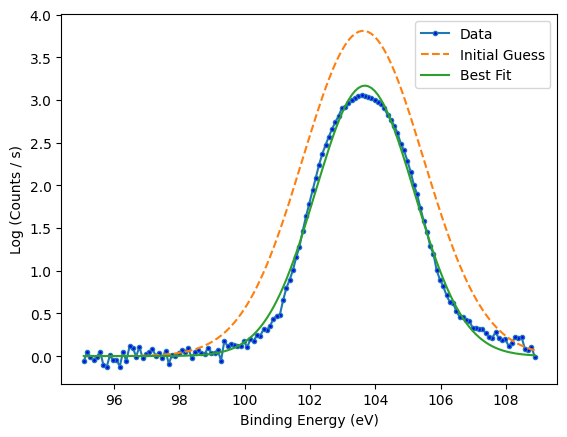

In [48]:
fig, ax = plt.subplots()

ax.plot(
    dados_x,
    dados_y,
    marker="o",
    markerfacecolor="blue",
    markersize=3,
    label="Data",
)

ax.plot(
    dados_x,
    result_fit.init_fit,
    linestyle="--",
    label="Initial Guess",
)

ax.plot(
    dados_x,
    result_fit.best_fit,
    linestyle="-",
    label="Best Fit",
)

ax.legend()
ax.set(xlabel="Binding Energy (eV)", ylabel="Log (Counts / s)");

# O

In [49]:
BE_O = [value for value in BE_O if ((value >= 526) or (value >= 538))]
COUNT_O = [count for count, value in zip(COUNT_O, BE_O) if ((value >= 526) or (value >= 538))]

#print(BE_O)

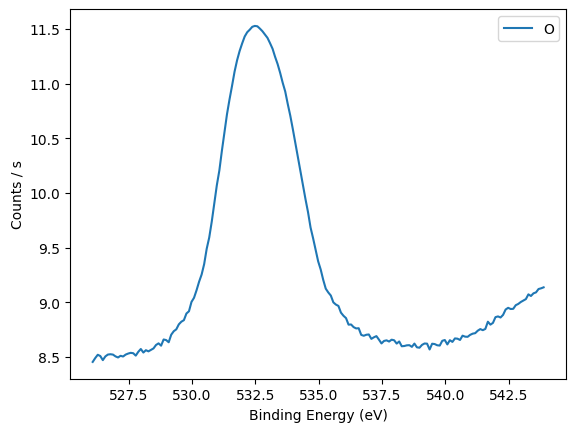

In [50]:
plt.plot(BE_O, COUNT_O, label="O")

plt.xlabel("Binding Energy (eV)")
plt.ylabel("Counts / s")

plt.legend()

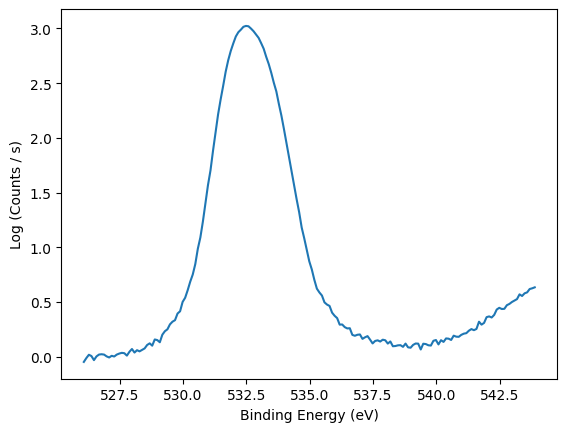

In [51]:
# Perform the logic for values <= 526
filtered_counts = [count for ev, count in zip(BE_O, COUNT_O) if ev <= 527]
mean_filtered_counts = sum(filtered_counts) / len(filtered_counts)  # Calculate mean

# Subtract the mean from all counts values
new_counts_O = [count - mean_filtered_counts for count in COUNT_O]

plt.plot(BE_O, new_counts_O)
plt.xlabel("Binding Energy (eV)")
plt.ylabel("Log (Counts / s)")
plt.show()

[[Model]]
    (Model(gaussian, prefix='g_') + Model(lorentzian, prefix='l_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 179
    # variables        = 6
    chi-square         = 0.61923283
    reduced chi-square = 0.00357938
    Akaike info crit   = -1002.33209
    Bayesian info crit = -983.207780
##  Warning: uncertainties could not be estimated:
    l_center:     at initial value
    l_center:     at boundary
[[Variables]]
    g_amplitude:  11.1042745 (init = 4)
    g_center:     532.663256 (init = 532)
    g_sigma:      1.45194857 (init = 1)
    g_fwhm:       3.41907753 == '2.3548200*g_sigma'
    g_height:     3.05104801 == '0.3989423*g_amplitude/max(1e-15, g_sigma)'
    l_amplitude:  4.52340096 (init = 4)
    l_center:     544.000000 (init = 544)
    l_sigma:      2.40371328 (init = 1)
    l_fwhm:       4.80742655 == '2.0000000*l_sigma'
    l_height:     0.59900793 == '0.3183099*l_amplitude/max(1e-15, l_sigma)'


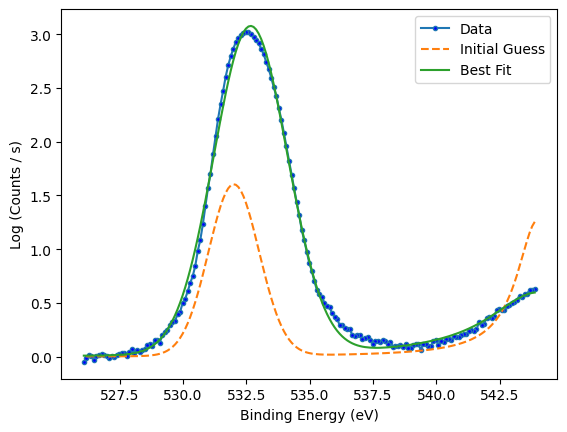

In [52]:
from lmfit.models import GaussianModel, LorentzianModel

model_gaussian = GaussianModel(prefix="g_")
model_lorentz = LorentzianModel(prefix="l_")
model_composite = model_gaussian + model_lorentz # Traduzir depois


params_gaussian = model_gaussian.make_params()
params_lorentz = model_lorentz.make_params()

params = params_gaussian + params_lorentz

params["g_center"].set(value=532, min=527, max=537)
params["g_amplitude"].set(value=4, min=0)

params["l_center"].set(value=544, min=535.5, max=544)
params["l_amplitude"].set(value=4, min=0)


dados_x = np.array(BE_O)
dados_y = np.array(new_counts_O)

result_fit = model_composite.fit(dados_y, params, x=dados_x)

print(result_fit.fit_report())

fig, ax = plt.subplots()

ax.plot(
    dados_x,
    dados_y,
    marker="o",
    markerfacecolor="blue",
    markersize=3,
    label="Data",
)

ax.plot(
    dados_x,
    result_fit.init_fit,
    linestyle="--",
    label="Initial Guess",
)

ax.plot(
    dados_x,
    result_fit.best_fit,
    linestyle="-",
    label="Best Fit",
)

ax.legend()
ax.set(xlabel="Binding Energy (eV)", ylabel="Log (Counts / s)");

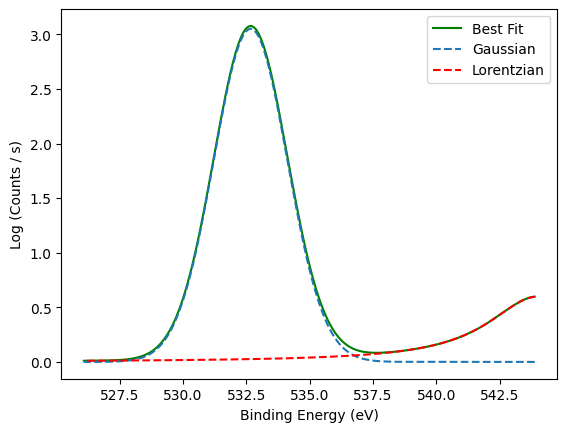

In [53]:
components_O = result_fit.eval_components(x=dados_x)

fig, ax = plt.subplots()

ax.plot(dados_x, result_fit.best_fit, color= "green", label="Best Fit")
ax.plot(dados_x, components_O["g_"], linestyle="dashed", label="Gaussian")
ax.plot(dados_x, components_O["l_"], linestyle="dashed", color="red", label="Lorentzian")

ax.legend()

ax.set(xlabel="Binding Energy (eV)", ylabel="Log (Counts / s)");

# C

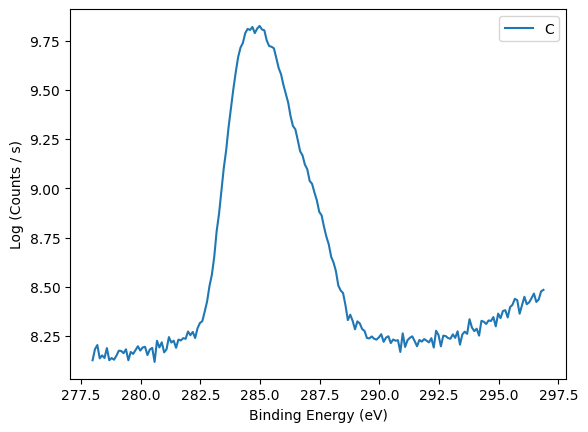

In [54]:
plt.plot(BE_C, COUNT_C, label="C")

plt.xlabel("Binding Energy (eV)")
plt.ylabel("Log (Counts / s)")

plt.legend()

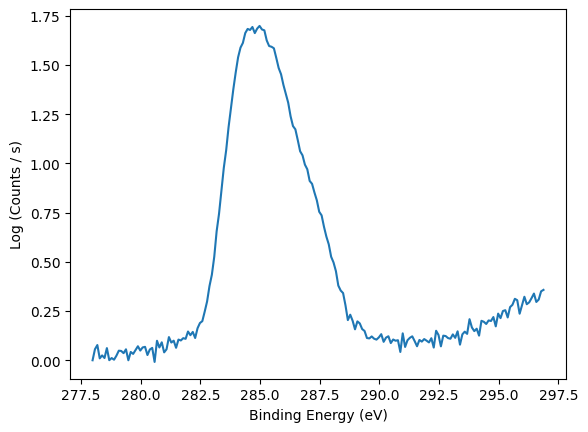

In [55]:
# Perform the logic for values <= 526
filtered_counts = [count for ev, count in zip(BE_C, COUNT_C) if ev <= 278]
mean_filtered_counts = sum(filtered_counts) / len(filtered_counts)  # Calculate mean

# Subtract the mean from all counts values
new_counts_C = [count - mean_filtered_counts for count in COUNT_C]

plt.plot(BE_C, new_counts_C)
plt.xlabel("Binding Energy (eV)")
plt.ylabel("Log (Counts / s)")
plt.show()

In [56]:
model_constant = ConstantModel()
model_gaussian1 = GaussianModel(prefix="g1_")
model_lorentz2 = LorentzianModel(prefix="l2_")
model_lorentz3 = LorentzianModel(prefix="l3_")

model_composite1 = model_constant + model_gaussian1 + model_lorentz2 + modelo_lorentz3

In [57]:
params_constant = model_constant.make_params()
params_gaussian1 = modelo_gaussian1.make_params()
params_lorentz2 = modelo_lorentz2.make_params()
params_lorentz3 = modelo_lorentz3.make_params()

params = params_constant + params_gaussian1 + params_lorentz2 + params_lorentz3

params.pretty_print(columns=['value', 'min', 'max', 'vary', 'expr'])

Name             Value      Min      Max     Vary     Expr
c                    0     -inf      inf     True     None
g1_amplitude         1     -inf      inf     True     None
g1_center            0     -inf      inf     True     None
g1_fwhm          2.355     -inf      inf    False 2.3548200*g1_sigma
g1_height       0.3989     -inf      inf    False 0.3989423*g1_amplitude/max(1e-15, g1_sigma)
g1_sigma             1        0      inf     True     None
l2_amplitude         1     -inf      inf     True     None
l2_center            0     -inf      inf     True     None
l2_fwhm              2     -inf      inf    False 2.0000000*l2_sigma
l2_height       0.3183     -inf      inf    False 0.3183099*l2_amplitude/max(1e-15, l2_sigma)
l2_sigma             1        0      inf     True     None
l3_amplitude         1     -inf      inf     True     None
l3_center            0     -inf      inf     True     None
l3_fwhm              2     -inf      inf    False 2.0000000*l3_sigma
l3_height      

In [58]:
params["g1_center"].set(value=285.1, min=280, max=292)
params["g1_amplitude"].set(value=2, min=0)
params["g1_sigma"].set(value=0.75)

params["l2_center"].set(value=286, min=285, max=288)
params["l2_amplitude"].set(value=2, min=0)
params["l2_sigma"].set(value=0.6)

params["l3_center"].set(value= 297.5, min=288, max= 297.5)
params["l3_amplitude"].set(value=1, min=0)

[[Model]]
    (((Model(constant) + Model(gaussian, prefix='g1_')) + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1036
    # data points      = 190
    # variables        = 10
    chi-square         = 0.31720156
    reduced chi-square = 0.00176223
    Akaike info crit   = -1195.09597
    Bayesian info crit = -1162.62573
##  Warning: uncertainties could not be estimated:
    l3_center:     at initial value
    l3_center:     at boundary
[[Variables]]
    c:            -0.03122885 (init = 0)
    g1_amplitude:  3.24230433 (init = 2)
    g1_center:     284.520031 (init = 285.1)
    g1_sigma:      0.94528892 (init = 0.75)
    g1_fwhm:       2.22598525 == '2.3548200*g1_sigma'
    g1_height:     1.36835662 == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
    l2_amplitude:  4.72888168 (init = 2)
    l2_center:     286.429407 (init = 286)
    l2_sigma:      1.40400888 (init = 0.6)
    l2_fwhm:    

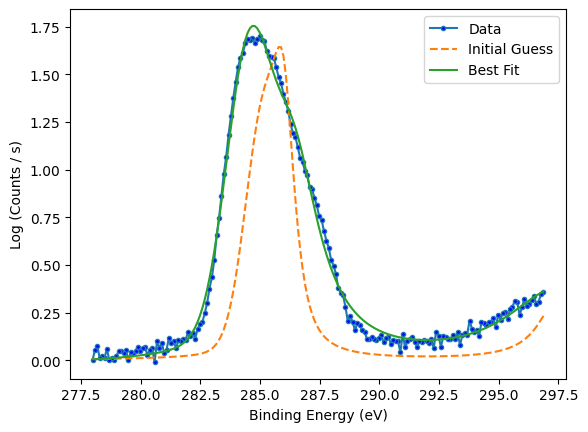

In [59]:
dados_x = np.array(BE_C)
dados_y = np.array(new_counts_C)

result_fit = model_composite1.fit(dados_y, params, x=dados_x)

print(result_fit.fit_report())

fig, ax = plt.subplots()

ax.plot(
    dados_x,
    dados_y,
    marker="o",
    markerfacecolor="blue",
    markersize=3,
    label="Data",
)

ax.plot(
    dados_x,
    result_fit.init_fit,
    linestyle="--",
    label="Initial Guess",
)

ax.plot(
    dados_x,
    result_fit.best_fit,
    linestyle="-",
    label="Best Fit",
)

ax.legend()
ax.set(xlabel="Binding Energy (eV)", ylabel="Log (Counts / s)");

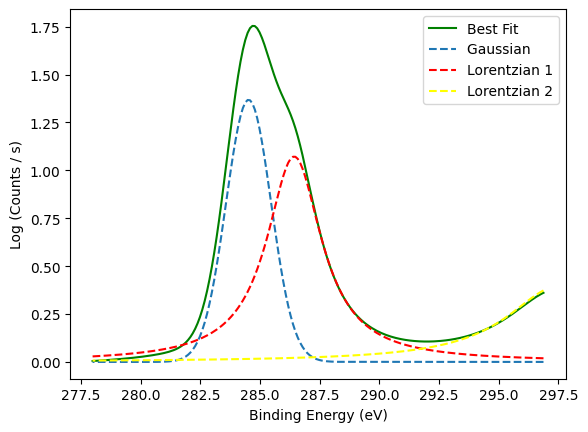

In [60]:
components_C = result_fit.eval_components(x=dados_x)

fig, ax = plt.subplots()

ax.plot(dados_x, result_fit.best_fit, color= "green", label="Best Fit")
ax.plot(dados_x, components_C["g1_"], linestyle="dashed", label="Gaussian ")
ax.plot(dados_x, components_C["l2_"], linestyle="dashed", color="red", label="Lorentzian 1")
ax.plot(dados_x, components_C["l3_"], linestyle="dashed", color="yellow", label="Lorentzian 2")


ax.legend()

ax.set(xlabel="Binding Energy (eV)", ylabel="Log (Counts / s)");